In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from scipy import stats
import statsmodels.api as sm
import plotly.express as px # for data visualization
import plotly.graph_objects as go
from scipy.interpolate import interp1d # for interpolation of new data points
import math
import statistics

In [4]:
lowess = sm.nonparametric.lowess

def a_controlOD(data):
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[83:86,3:53])
    num = df1.to_numpy().reshape(150,)
    return num

def aver_controlOD(data):
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[83:86,3:53])
    mean = df1.mean(0)
    return mean

def lb_OD(data):
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[93,3:53])
    num_pre = df1.to_numpy().reshape(50,)
    num_list = num_pre.tolist() * 3
    num = np.array(num_list).reshape(150,)
    return num

def ra_autofluo(data):
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[83:86,3:53])
    num = df1.to_numpy().reshape(150,)
    return num

def ga_autofluo(data):
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[83:86,53:103])
    num = df1.to_numpy().reshape(150,)
    return num

def ba_autofluo(data):
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[83:86,103:153])
    num = df1.to_numpy().reshape(150,)
    return num

In [41]:
od = a_controlOD('C:\Clariostar\TL 56 OD.xlsx'); lbod = lb_OD('C:\Clariostar\TL 56 OD.xlsx')
normalod = od - lbod

In [4]:
ra = ra_autofluo('C:\Clariostar\TL 56 RGB.xlsx')
ga = ga_autofluo('C:\Clariostar\TL 56 RGB.xlsx')
ba = ba_autofluo('C:\Clariostar\TL 56 RGB.xlsx')

oddf = pd.DataFrame(normalod)
rdf = pd.DataFrame(ra)
gdf = pd.DataFrame(ga)
bdf = pd.DataFrame(ba)
result = pd.concat([oddf, rdf, gdf, bdf], axis=1)
result.columns = ['OD', 'RFP', 'GFP', 'BFP']
print(result)

        OD RFP  GFP   BFP
0    0.012  65  698  3541
1    0.035  72  711  3500
2    0.053  71  716  3505
3    0.034  75  713  3503
4    0.034  68  708  3488
..     ...  ..  ...   ...
145  0.534  74  739  3287
146  0.555  68  743  3326
147  0.548  79  753  3397
148  0.575  71  742  3354
149  0.579  66  747  3428

[150 rows x 4 columns]


In [17]:
x=result.iloc[:, 0]
y=result.iloc[:, 1]
y_hat2 = lowess(y, x, frac=1/5)

fig = px.scatter(result, x, y, opacity=0.8, color_discrete_sequence=['black'])

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

fig.add_traces(go.Scatter(x=y_hat2[:,0], y=y_hat2[:,1], line=dict(color='red')))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=False, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=False, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')
fig.update_layout(xaxis_showgrid=False, yaxis_showgrid=False)
fig.update_layout(showlegend=False)

# Set figure title
fig.update_layout(title=dict(text="Autofluorescence (Red)",  font=dict(family = 'Arial', color='black', size = 20)), xaxis_title=dict(text='$OD_{600}$',  font=dict(family = 'Arial', color='black', size = 14)), yaxis_title=dict(text="Fluorescence Intensity (a.u.)",  font=dict(family = 'Arial', color='black', size = 17)))


# Update marker size
fig.update_traces(marker=dict(size=5))


fig.show()

In [18]:
x=result.iloc[:, 0]
y=result.iloc[:, 2]
y_hat4 = lowess(y, x, frac=1/5)

fig = px.scatter(result, x, y, opacity=0.8, color_discrete_sequence=['black'])

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

fig.add_traces(go.Scatter(x=y_hat4[:,0], y=y_hat4[:,1], name='LOWESS, frac=1/5', line=dict(color='green')))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=False, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=False, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Autofluorescence (Green)",  font=dict(family = 'Arial', color='black', size = 20)), xaxis_title=dict(text="$OD_{600}$",  font=dict(family = 'Arial', color='black', size = 14)), yaxis_title=dict(text="Fluorescence Intensity (a.u.)",  font=dict(family = 'Arial', color='black', size = 17)))
fig.update_layout(xaxis_showgrid=False, yaxis_showgrid=False)
fig.update_layout(showlegend=False)

# Update marker size
fig.update_traces(marker=dict(size=5))

fig.show()

In [20]:
x=result.iloc[:, 0]
y=result.iloc[:, 3]
y_hat6 = lowess(y, x, frac=1/5)

fig = px.scatter(result, x, y, opacity=0.8, color_discrete_sequence=['black'])

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

fig.add_traces(go.Scatter(x=y_hat6[:,0], y=y_hat6[:,1], name='LOWESS, frac=1/5', line=dict(color='blue')))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=False, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=False, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Autofluorescence (Blue)", font=dict(family = 'Arial', color='black', size = 20)), xaxis_title=dict(text="$OD_{600}$",  font=dict(family = 'Arial', color='black', size = 14)), yaxis_title=dict(text="Fluorescence Intensity (a.u.)",  font=dict(family = 'Arial', color='black', size = 17)))
fig.update_layout(xaxis_showgrid=False, yaxis_showgrid=False)
fig.update_layout(showlegend=False)
# Update marker size
fig.update_traces(marker=dict(size=5))


fig.show()

In [5]:
def pbs_rblank(data):
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[86:89,3:53])
    mean = df1.mean(0)
    intermediate = np.array(mean).reshape(1, 50)
    mean2 = np.repeat(intermediate, 12, axis=0)
    num = np.array(mean2).reshape(12, 50)
    return num

def pbs_gblank(data):
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[86:89,53:103])
    mean = df1.mean(0)
    intermediate = np.array(mean).reshape(1, 50)
    mean2 = np.repeat(intermediate, 12, axis=0)
    num = np.array(mean2).reshape(12, 50)
    return num

def dmso_bblank(data):
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[83:86,103:153])
    mean = df1.mean(0)
    intermediate = np.array(mean).reshape(1, 50)
    mean2 = np.repeat(intermediate, 12, axis=0)
    num = np.array(mean2).reshape(12, 50)
    return num

def rfp1(data):
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[11:23,3:53])
    num1 = np.array(df1).reshape(12,50)
    return num1

def rfp2(data):
    d = pd.read_excel(data)
    df2 = pd.DataFrame(d.iloc[47:59,3:53])
    num2 = np.array(df2).reshape(12,50)
    return num2

def rfpod1(data):
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[11:23,3:53])
    num1 = np.array(df1).reshape(12,50)
    return num1

def rfpod2(data):
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[47:59,3:53])
    num1 = np.array(df1).reshape(12,50)
    return num1

def gfp1(data):
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[23:35,53:103])
    num1 = np.array(df1).reshape(12,50)
    return num1

def gfp2(data):
    d = pd.read_excel(data)
    df2 = pd.DataFrame(d.iloc[59:71,53:103])
    num2 = np.array(df2).reshape(12,50)
    return num2

def gfpod1(data):
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[23:35,3:53])
    num1 = np.array(df1).reshape(12,50)
    return num1

def gfpod2(data):
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[59:71,3:53])
    num1 = np.array(df1).reshape(12,50)
    return num1

def bfp1(data):
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[35:47,103:153])
    num1 = np.array(df1).reshape(12,50)
    return num1

def bfp2(data):
    d = pd.read_excel(data)
    df2 = pd.DataFrame(d.iloc[71:83,103:153])
    num2 = np.array(df2).reshape(12,50)
    return num2

def bfpod1(data):
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[35:47,3:53])
    num1 = np.array(df1).reshape(12,50)
    return num1

def bfpod2(data):
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[71:83,3:53])
    num1 = np.array(df1).reshape(12,50)
    return num1

In [6]:
pbsrblank = pbs_rblank('C:\Clariostar\TL 56 RGB.xlsx')
pbsgblank = pbs_gblank('C:\Clariostar\TL 56 RGB.xlsx')
dmsobblank = dmso_bblank('C:\Clariostar\TL 56 RGB.xlsx')

In [9]:
rfparray1 = rfp1('C:\Clariostar\TL 56 RGB.xlsx'); rfparray2 = rfp2('C:\Clariostar\TL 56 RGB.xlsx')
rfpod1_ = rfpod1('C:\Clariostar\TL 56 OD.xlsx'); rfpod2_ = rfpod2('C:\Clariostar\TL 56 OD.xlsx') 

normalised1 = rfparray1 - pbsrblank; normalised2 = rfparray2 - pbsrblank;
averageod = np.mean((rfpod1_, rfpod2_), axis = 0)

mul = normalised1 * normalised2; 
geometricmeanr = np.power(mul.astype(float), 0.5)

# geometricmean

log1 = np.log(normalised1.astype(float)); log2 = np.log(normalised2.astype(float))
stda = np.std((log1, log2), axis = 0 , ddof = 1); 
geometricstd = np.exp(stda)

# geometricstd

conv = (geometricmeanr / (59.5 * np.exp(0.005955*900) - 820.69976))**(1/0.9183)

dividr = conv / averageod.astype(float)
metrod = dividr * 6.02214076 * 10**23 / 10**6
metrod
# dividr

array([[4733756369294501.0, 5789127935874142.0, 5446901065784307.0,
        4958933974186480.0, 4709504749284598.0, 4783655101170434.0,
        4412171288928554.0, 4948527139595999.0, 4628663953015522.0,
        4174452720054094.5, 3630284553596148.5, 4797377708761354.0,
        3812378322112965.0, 3747009048924925.0, 2938744341544082.5,
        3046594809600403.0, 3011199303750166.5, 2949477315880261.5,
        2660381158714405.0, 2422107382490071.5, 2560552246299522.0,
        2592411278853733.5, 2202488084408327.8, 2427278302568801.5,
        2303882882371648.0, 2068624036162226.0, 1919215855594820.2,
        2174061045548424.8, 2108736605817410.0, 2210451203955355.2,
        2456373429584367.0, 2537517275757471.5, 2707497752913361.5,
        2630608740730491.5, 2775717440968813.0, 3010208221807011.5,
        3102915232022023.5, 3112669761000709.5, 3272558599154806.5,
        3380271225619418.5, 3690859033527098.0, 3707972869137666.0,
        3845525079390096.0, 4104044780256579.5, 

In [10]:
gfparray1 = gfp1('C:\Clariostar\TL 56 RGB.xlsx'); gfparray2 = gfp2('C:\Clariostar\TL 56 RGB.xlsx')
gfpod1_ = gfpod1('C:\Clariostar\TL 56 OD.xlsx'); gfpod2_ = gfpod2('C:\Clariostar\TL 56 OD.xlsx')

normalised1 = gfparray1 - pbsgblank; normalised2 = gfparray2 - pbsgblank;
averageod = np.mean((gfpod1_, gfpod2_), axis = 0)


mul = normalised1 * normalised2; 
geometricmeang = np.power(mul.astype(float), 0.5)

# geometricmean

log1 = np.log(normalised1.astype(float)); log2 = np.log(normalised2.astype(float))
stda = np.std((log1, log2), axis = 0 , ddof = 1); 
geometricstd = np.exp(stda)

# geometricstd

conv = (geometricmeang / (374.3939636794427  * np.exp(0.011329918073272296*400) - 2309.822002895055))**(1/0.9794646387316412)

dividg = conv / averageod.astype(float)
meflod = dividg * 6.02214076 * 10**23 / 10**6
meflod

array([[9.288817907718048e+16, 8.813380528801659e+16,
        7.929492941677861e+16, 7.317776759544131e+16,
        7.0128671335016376e+16, 6.482841565168315e+16,
        6.015761887730202e+16, 5.803148042432996e+16,
        5.399069505518738e+16, 5.087310213173213e+16,
        4.734692519991093e+16, 4.5805384109291816e+16,
        4.214882453771656e+16, 3.96380456270373e+16,
        3.7064444749609896e+16, 3.547564653938983e+16,
        3.2640334711718224e+16, 3.0200916212189068e+16,
        2.899908484604827e+16, 2.6943720723852148e+16,
        2.502820417918401e+16, 2.322371258678556e+16,
        2.187086381712091e+16, 2.150410813563792e+16,
        2.054903281316176e+16, 2.010256047356921e+16,
        2.0029504853786424e+16, 1.926830526373196e+16,
        1.8765918272190716e+16, 1.839669901211877e+16,
        1.8344036917321708e+16, 1.812508463667385e+16,
        1.7832822769400036e+16, 1.7598522809888918e+16,
        1.763423413618889e+16, 1.7632375698282816e+16,
        1.7406570

In [11]:
bfparray1 = bfp1('C:\Clariostar\TL 56 RGB.xlsx'); bfparray2 = bfp2('C:\Clariostar\TL 56 RGB.xlsx')
bfpod1_ = gfpod1('C:\Clariostar\TL 56 OD.xlsx'); bfpod2_ = gfpod2('C:\Clariostar\TL 56 OD.xlsx')

normalised1 = bfparray1 - dmsobblank; normalised2 = bfparray2 - dmsobblank;
averageod = np.mean((gfpod1_, gfpod2_), axis = 0)


mul = normalised1 * normalised2; 
geometricmeanb = np.power(mul.astype(float), 0.5)

# geometricmean

log1 = np.log(normalised1.astype(float)); log2 = np.log(normalised2.astype(float))
stda = np.std((log1, log2), axis = 0 , ddof = 1); 
geometricstd = np.exp(stda)

# geometricstd

conv = (geometricmeanb / (75.03461865964644 * np.exp(0.005227010342047294*1100) - 1902.580447467398))**(1/0.9888400807891187)

dividb = conv / averageod.astype(float)
mec3od = dividb * 6.02214076 * 10**23 / 10**6
mec3od

array([[2.5969351052056637e+17, 2.3259834176448227e+17,
        1.9650270571650304e+17, 1.8159198111758848e+17,
        1.6879317258021187e+17, 1.5356231607954845e+17,
        1.3631161199673936e+17, 1.2706830064863418e+17,
        1.1440233262775869e+17, 1.0585212375295909e+17,
        9.602251208143293e+16, 9.067167893079046e+16,
        8.160885810563707e+16, 7.356588960750563e+16,
        6.391153604886118e+16, 5.980054900428461e+16,
        5.216833789362426e+16, 4.649560435156008e+16,
        4.324658050781356e+16, 3.818803501012131e+16,
        3.3285040706540996e+16, 3.0718399972279564e+16,
        2.725367844148265e+16, 2.562733888141916e+16,
        2.419650208982991e+16, 2.396829818427041e+16,
        2.3258477908091424e+16, 2.239942413535626e+16,
        2.2217518269007972e+16, 2.1259408939535876e+16,
        2.2317164525085344e+16, 2.0809454056391056e+16,
        2.063084566906314e+16, 2.0165504293381256e+16,
        2.057267823696299e+16, 1.9535207540443424e+16,
        1

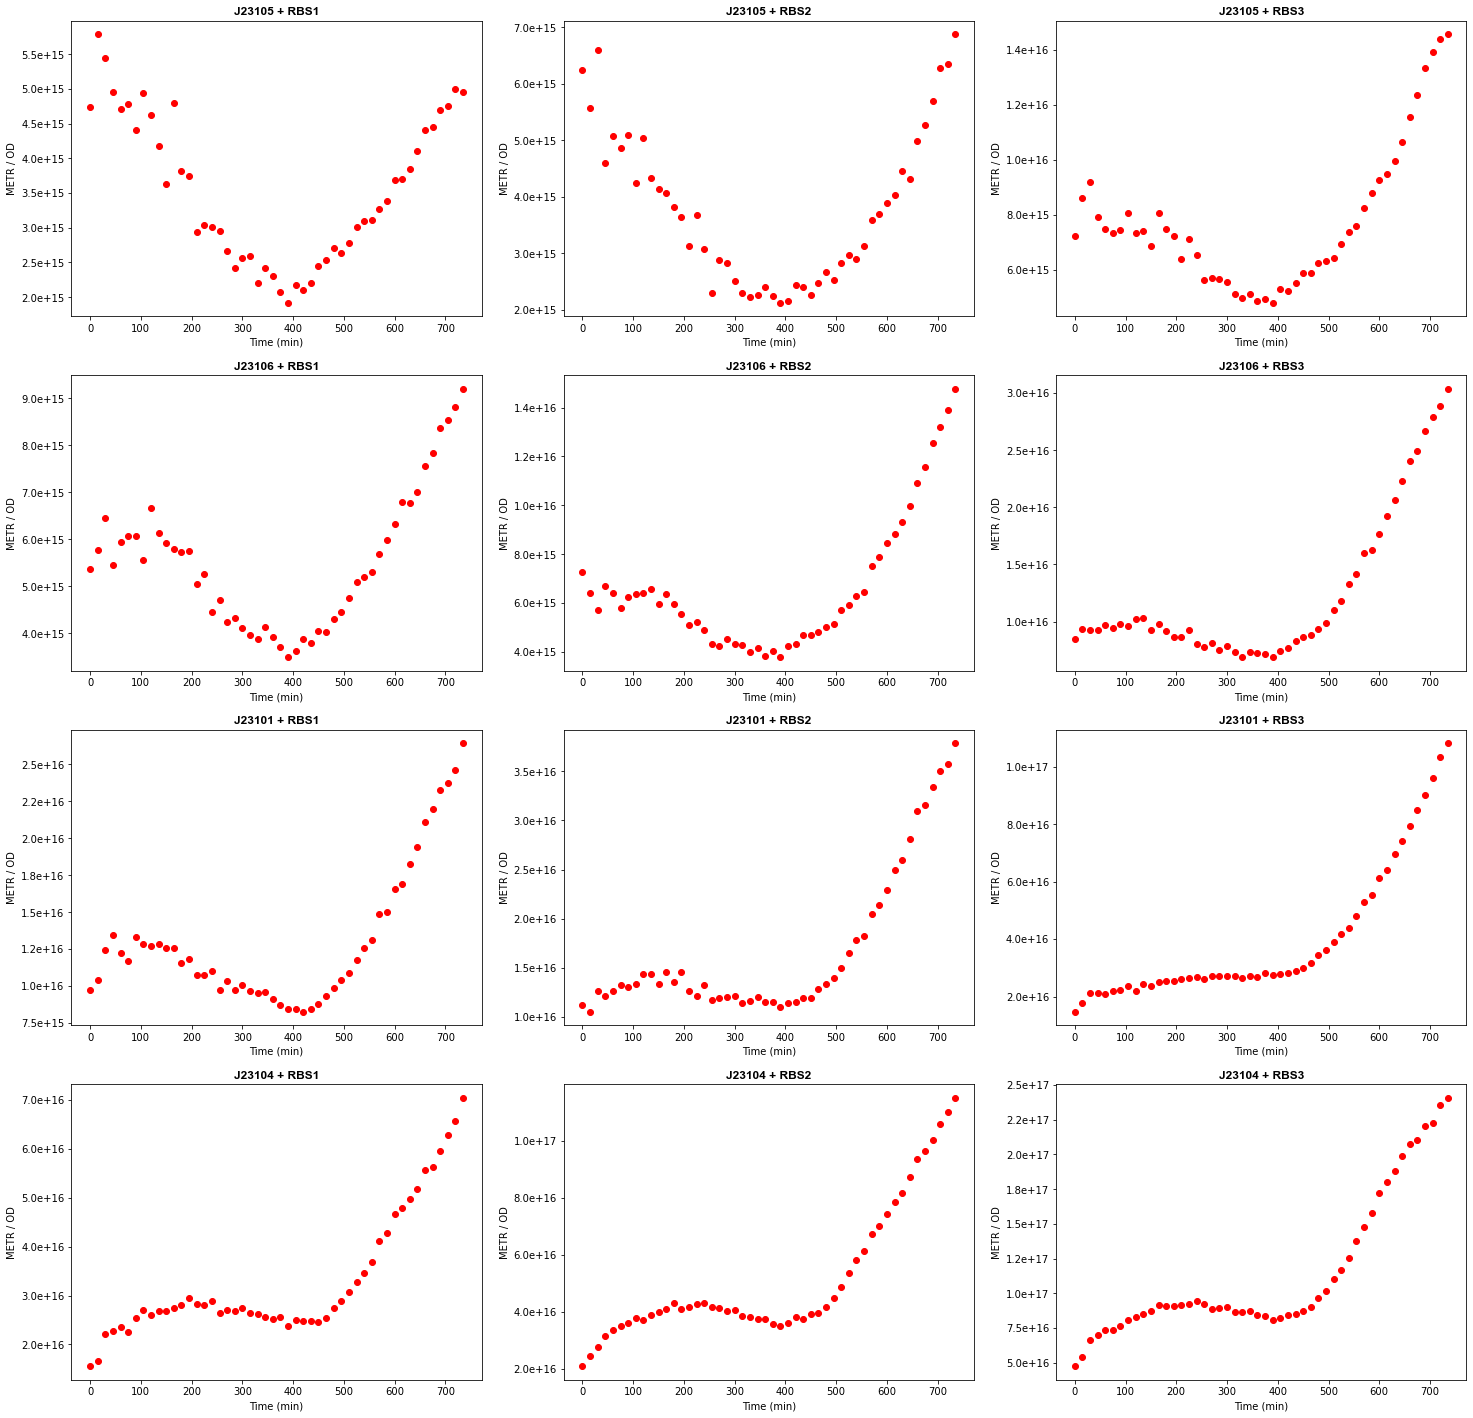

In [12]:
cycle = [i*15 for i in range(50)]; x = cycle
y1 = metrod[0, :]; y2 = metrod[1, :]; y3 = metrod[2, :]; y4 = metrod[3, :]
y5 = metrod[4, :]; y6 = metrod[5, :]; y7 = metrod[6, :]; y8 = metrod[7, :]
y9 = metrod[8, :]; y10 = metrod[9, :]; y11 = metrod[10, :]; y12 = metrod[11, :]

fig_dims = (25, 25); fig, axs = plt.subplots(4, 3, figsize=fig_dims)

axs[0,0].scatter(x, y1, c='r'); axs[0,1].scatter(x, y2, c='r'); axs[0,2].scatter(x, y3, c='r'); 
axs[1,0].scatter(x, y4, c='r'); axs[1,1].scatter(x, y5, c='r'); axs[1,2].scatter(x, y6, c='r'); 
axs[2,0].scatter(x, y7, c='r'); axs[2,1].scatter(x, y8, c='r'); axs[2,2].scatter(x, y9, c='r'); 
axs[3,0].scatter(x, y10, c='r'); axs[3,1].scatter(x, y11, c='r'); axs[3,2].scatter(x, y12, c='r')

axs[0,0].set_title('J23105 + RBS1', fontname="Arial", fontweight='bold'); axs[0,1].set_title('J23105 + RBS2', fontname="Arial", fontweight='bold'); axs[0,2].set_title('J23105 + RBS3', fontname="Arial", fontweight='bold')
axs[1,0].set_title('J23106 + RBS1', fontname="Arial", fontweight='bold'); axs[1,1].set_title('J23106 + RBS2', fontname="Arial", fontweight='bold'); axs[1,2].set_title('J23106 + RBS3', fontname="Arial", fontweight='bold')
axs[2,0].set_title('J23101 + RBS1', fontname="Arial", fontweight='bold'); axs[2,1].set_title('J23101 + RBS2', fontname="Arial", fontweight='bold'); axs[2,2].set_title('J23101 + RBS3', fontname="Arial", fontweight='bold')
axs[3,0].set_title('J23104 + RBS1', fontname="Arial", fontweight='bold'); axs[3,1].set_title('J23104 + RBS2', fontname="Arial", fontweight='bold'); axs[3,2].set_title('J23104 + RBS3', fontname="Arial", fontweight='bold')

# fig.suptitle('mCherry Expression Dynamics', fontname = 'Arial', fontsize=20)
for ax in axs.flat:
    ax.set(xlabel='Time (min)', ylabel='METR / OD')
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

# plt.savefig('mCherry.png', dpi = 300)    
plt.show()

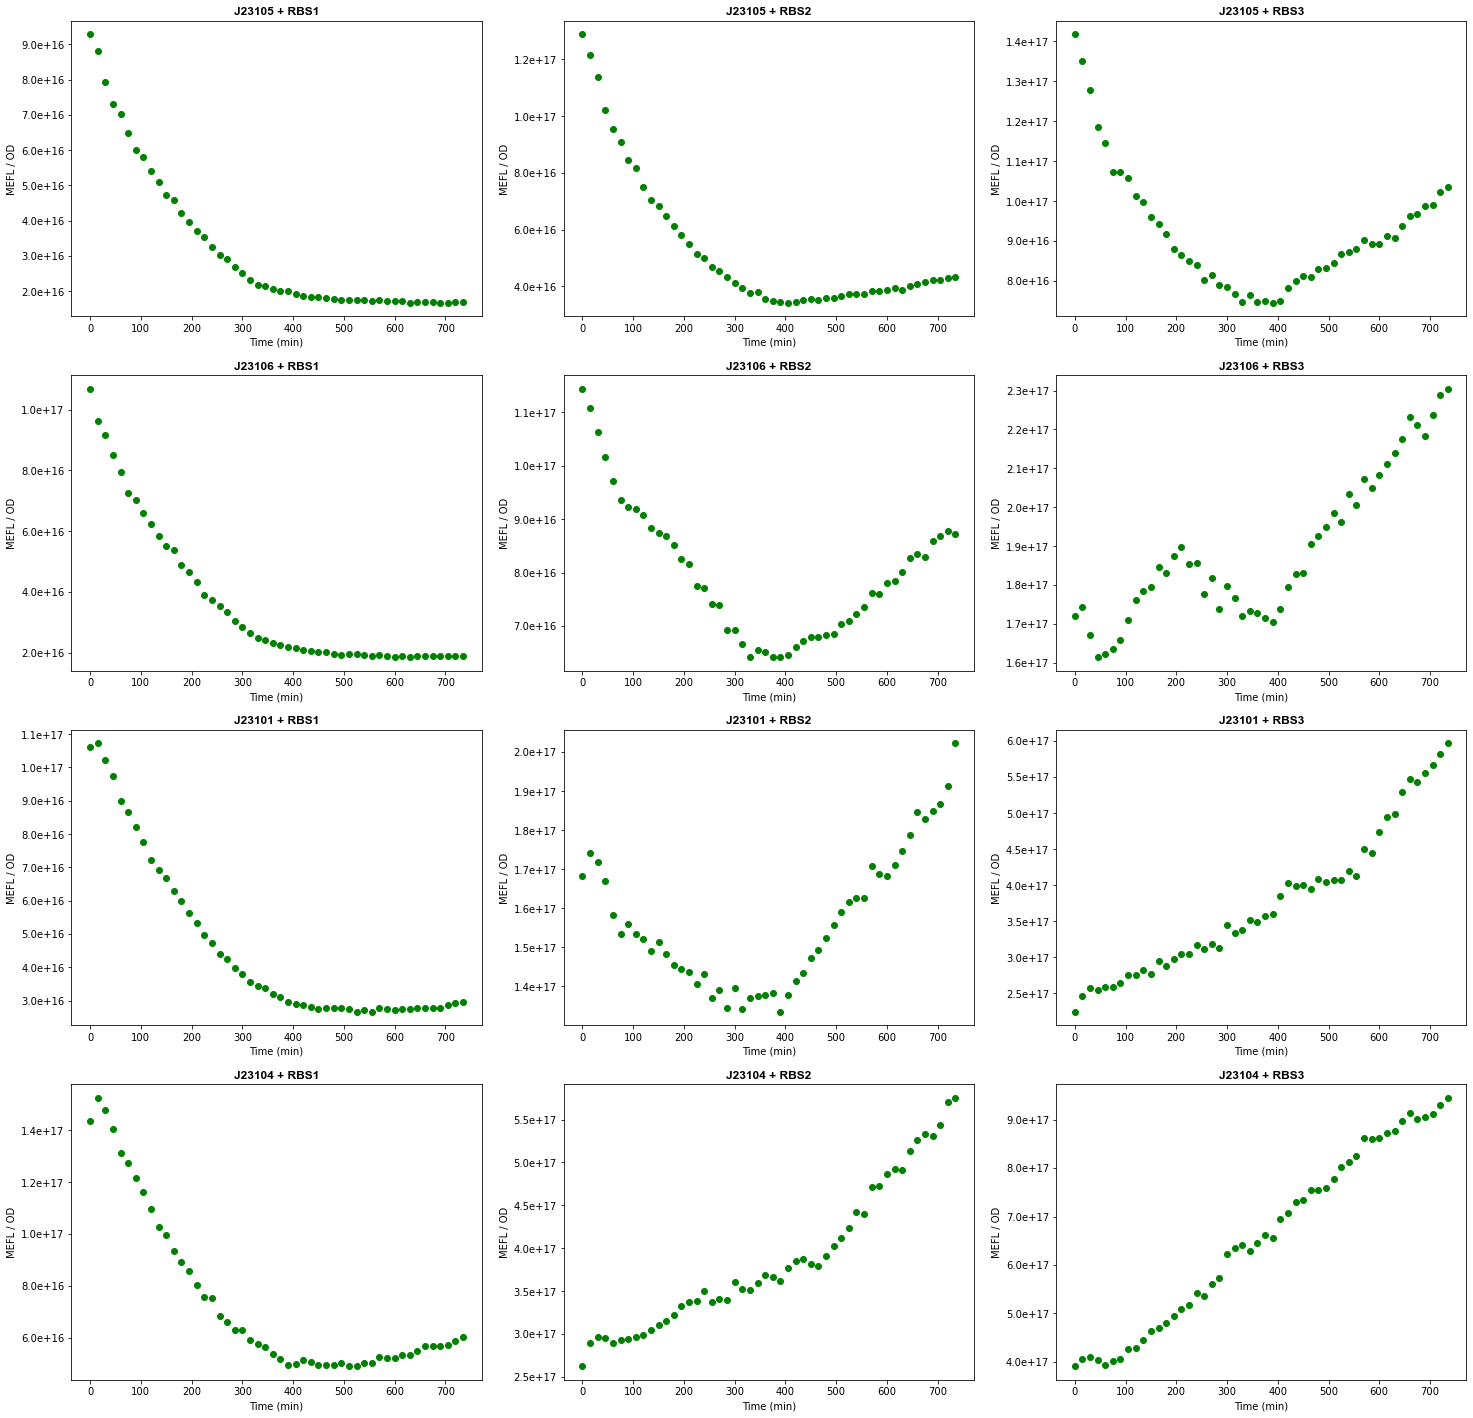

In [13]:
cycle = [i*15 for i in range(50)]; x = cycle
y1 = meflod[0, :]; y2 = meflod[1, :]; y3 = meflod[2, :]; y4 = meflod[3, :]
y5 = meflod[4, :]; y6 = meflod[5, :]; y7 = meflod[6, :]; y8 = meflod[7, :]
y9 = meflod[8, :]; y10 = meflod[9, :]; y11 = meflod[10, :]; y12 = meflod[11, :]

fig_dims = (25, 25); fig, axs = plt.subplots(4, 3, figsize=fig_dims)

axs[0,0].scatter(x, y1, c='green'); axs[0,1].scatter(x, y2, c='green'); axs[0,2].scatter(x, y3, c='green'); 
axs[1,0].scatter(x, y4, c='green'); axs[1,1].scatter(x, y5, c='green'); axs[1,2].scatter(x, y6, c='green'); 
axs[2,0].scatter(x, y7, c='green'); axs[2,1].scatter(x, y8, c='green'); axs[2,2].scatter(x, y9, c='green'); 
axs[3,0].scatter(x, y10, c='green'); axs[3,1].scatter(x, y11, c='green'); axs[3,2].scatter(x, y12, c='green')

axs[0,0].set_title('J23105 + RBS1', fontname="Arial", fontweight='bold'); axs[0,1].set_title('J23105 + RBS2', fontname="Arial", fontweight='bold'); axs[0,2].set_title('J23105 + RBS3', fontname="Arial", fontweight='bold')
axs[1,0].set_title('J23106 + RBS1', fontname="Arial", fontweight='bold'); axs[1,1].set_title('J23106 + RBS2', fontname="Arial", fontweight='bold'); axs[1,2].set_title('J23106 + RBS3', fontname="Arial", fontweight='bold')
axs[2,0].set_title('J23101 + RBS1', fontname="Arial", fontweight='bold'); axs[2,1].set_title('J23101 + RBS2', fontname="Arial", fontweight='bold'); axs[2,2].set_title('J23101 + RBS3', fontname="Arial", fontweight='bold')
axs[3,0].set_title('J23104 + RBS1', fontname="Arial", fontweight='bold'); axs[3,1].set_title('J23104 + RBS2', fontname="Arial", fontweight='bold'); axs[3,2].set_title('J23104 + RBS3', fontname="Arial", fontweight='bold')

# fig.suptitle('mCherry Expression Dynamics', fontname = 'Arial', fontsize=20)
for ax in axs.flat:
    ax.set(xlabel='Time (min)', ylabel='MEFL / OD')
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
    
# plt.savefig('sfGFP.png', dpi = 300)   
plt.show()

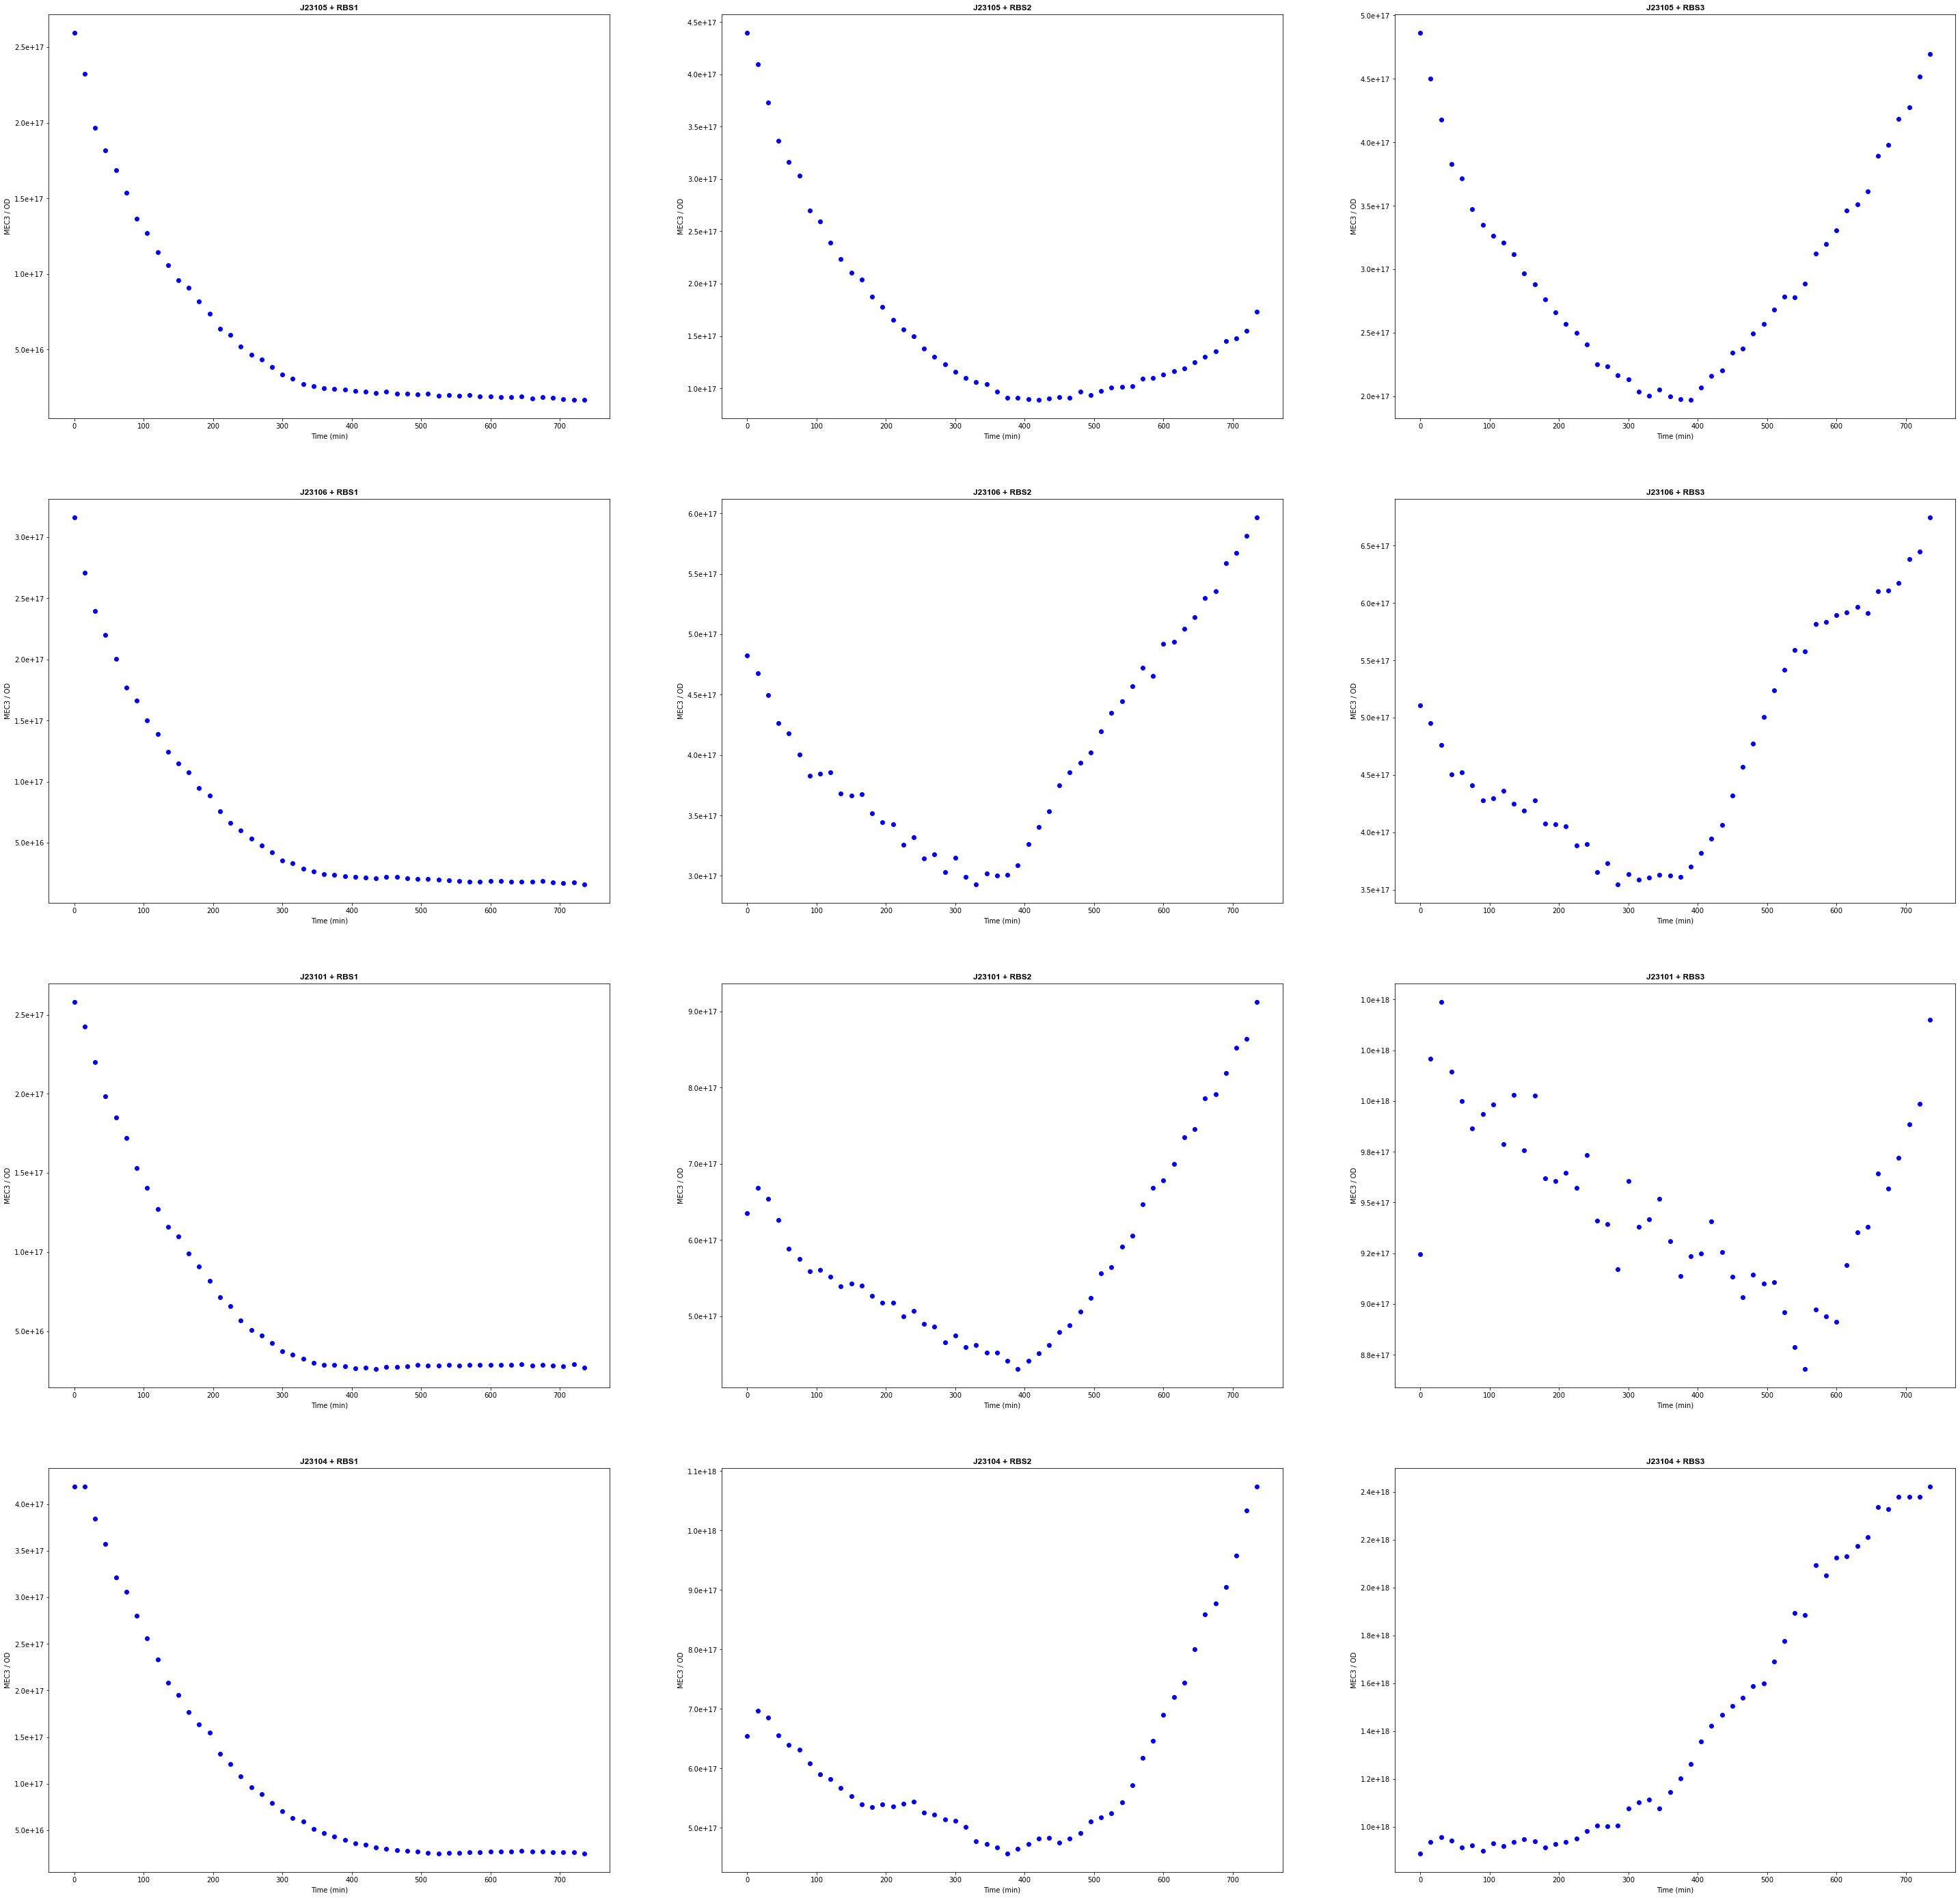

In [14]:
cycle = [i*15 for i in range(50)]; x = cycle
y1 = mec3od[0, :]; y2 = mec3od[1, :]; y3 = mec3od[2, :]; y4 = mec3od[3, :]
y5 = mec3od[4, :]; y6 = mec3od[5, :]; y7 = mec3od[6, :]; y8 = mec3od[7, :]
y9 = mec3od[8, :]; y10 = mec3od[9, :]; y11 = mec3od[10, :]; y12 = mec3od[11, :]

fig_dims = (50, 50); fig, axs = plt.subplots(4, 3, figsize=fig_dims)

axs[0,0].scatter(x, y1, c='b'); axs[0,1].scatter(x, y2, c='blue'); axs[0,2].scatter(x, y3, c='blue'); 
axs[1,0].scatter(x, y4, c='b'); axs[1,1].scatter(x, y5, c='blue'); axs[1,2].scatter(x, y6, c='blue'); 
axs[2,0].scatter(x, y7, c='b'); axs[2,1].scatter(x, y8, c='blue'); axs[2,2].scatter(x, y9, c='blue'); 
axs[3,0].scatter(x, y10, c='b'); axs[3,1].scatter(x, y11, c='blue'); axs[3,2].scatter(x, y12, c='blue')

axs[0,0].set_title('J23105 + RBS1', fontname="Arial", fontweight='bold'); axs[0,1].set_title('J23105 + RBS2', fontname="Arial", fontweight='bold'); axs[0,2].set_title('J23105 + RBS3', fontname="Arial", fontweight='bold')
axs[1,0].set_title('J23106 + RBS1', fontname="Arial", fontweight='bold'); axs[1,1].set_title('J23106 + RBS2', fontname="Arial", fontweight='bold'); axs[1,2].set_title('J23106 + RBS3', fontname="Arial", fontweight='bold')
axs[2,0].set_title('J23101 + RBS1', fontname="Arial", fontweight='bold'); axs[2,1].set_title('J23101 + RBS2', fontname="Arial", fontweight='bold'); axs[2,2].set_title('J23101 + RBS3', fontname="Arial", fontweight='bold')
axs[3,0].set_title('J23104 + RBS1', fontname="Arial", fontweight='bold'); axs[3,1].set_title('J23104 + RBS2', fontname="Arial", fontweight='bold'); axs[3,2].set_title('J23104 + RBS3', fontname="Arial", fontweight='bold')

# fig.suptitle('mCherry Expression Dynamics', fontname = 'Arial', fontsize=20)
for ax in axs.flat:
    ax.set(xlabel='Time (min)', ylabel='MEC3 / OD')
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

# plt.savefig('mTagBFP2.png', dpi = 300)
plt.show()

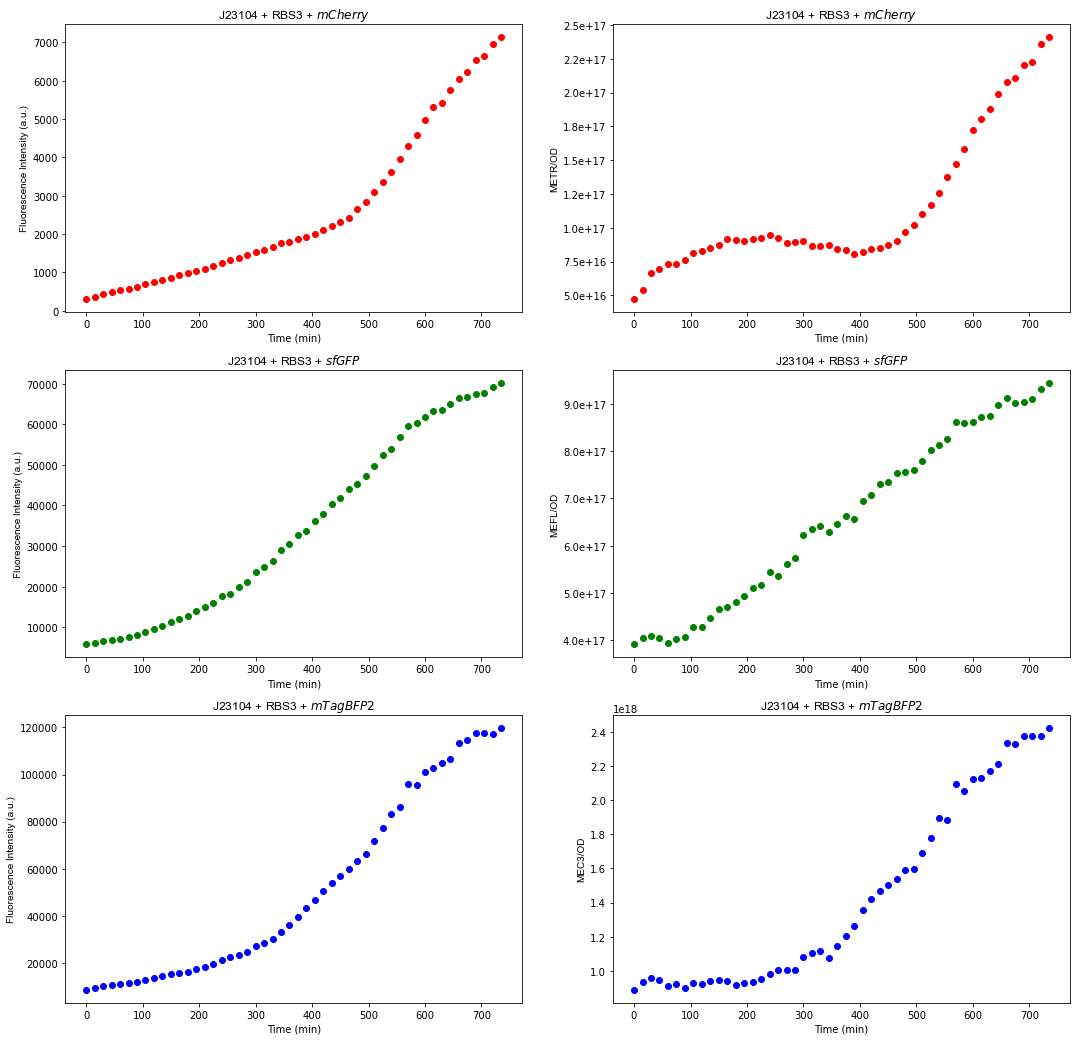

In [15]:
import matplotlib.ticker as mtick
cycle = [i*15 for i in range(50)]; x = cycle
y1 = geometricmeang[11, :]; y2 = meflod[11, :]; y3 = geometricmeanb[11, :]; y4 = mec3od[11, :]; 
y5 = geometricmeanr[11, :]; y6 = metrod[11, :]

fig_dims = (18, 18); fig, axs = plt.subplots(3, 2, figsize=fig_dims)

axs[0,0].scatter(x, y5, c='red'); axs[0,1].scatter(x, y6, c='red');
axs[1,0].scatter(x, y1, c='green'); axs[1,1].scatter(x, y2, c='green'); 
axs[2,0].scatter(x, y3, c='blue'); axs[2,1].scatter(x, y4, c='blue'); 

axs[0,0].set_title('J23104 + RBS3 + $\it{mCherry}$', fontname="Arial"); axs[0,0].set_ylabel('Fluorescence Intensity (a.u.)', fontname="Arial")
axs[0,1].set_title('J23104 + RBS3 + $\it{mCherry}$', fontname="Arial"); axs[0,1].set_ylabel('METR/OD', fontname="Arial")
axs[1,0].set_title('J23104 + RBS3 + $\it{sfGFP}$', fontname="Arial"); axs[1,0].set_ylabel('Fluorescence Intensity (a.u.)', fontname="Arial")
axs[1,1].set_title('J23104 + RBS3 + $\it{sfGFP}$', fontname="Arial"); axs[1,1].set_ylabel('MEFL/OD', fontname="Arial")
axs[2,0].set_title('J23104 + RBS3 + $\it{mTagBFP2}$', fontname="Arial"); axs[2,0].set_ylabel('Fluorescence Intensity (a.u.)', fontname="Arial")
axs[2,1].set_title('J23104 + RBS3 + $\it{mTagBFP2}$', fontname="Arial"); axs[2,1].set_ylabel('MEC3/OD', fontname="Arial")

axs[0,1].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
axs[1,1].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
# fig.suptitle('mCherry Expression Dynamics', fontname = 'Arial', fontsize=20)
for ax in axs.flat:
    ax.set(xlabel='Time (min)')


# plt.savefig('comparison.png', dpi = 300)
plt.show()

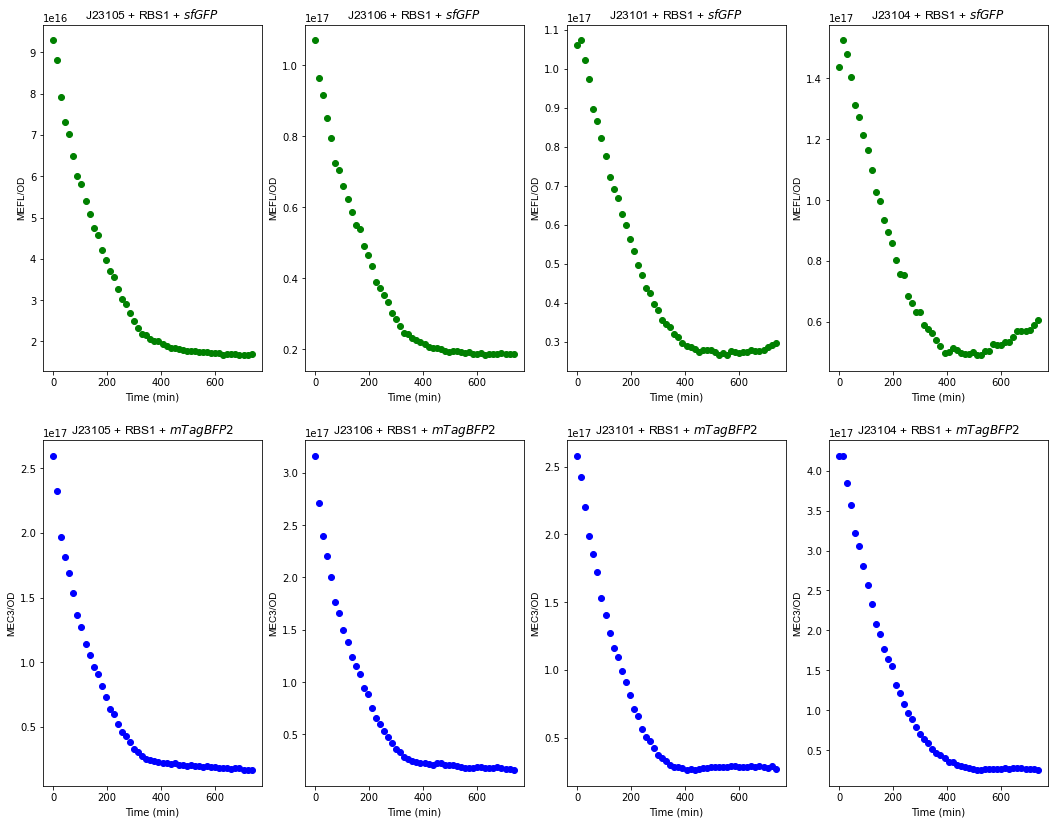

In [31]:
import matplotlib.ticker as mtick
cycle = [i*15 for i in range(50)]; x = cycle
y1 = meflod[0, :]; y2 = meflod[3, :]; y3 = meflod[6, :]; y4 = meflod[9, :]; 
y5 = mec3od[0, :]; y6 = mec3od[3, :]; y7 = mec3od[6, :]; y8 = mec3od[9, :];

fig_dims = (18, 14); fig, axs = plt.subplots(2, 4, figsize=fig_dims)

axs[0,0].scatter(x, y1, c='green'); axs[0,1].scatter(x, y2, c='green');
axs[0,2].scatter(x, y3, c='green'); axs[0,3].scatter(x, y4, c='green'); 
axs[1,0].scatter(x, y5, c='blue'); axs[1,1].scatter(x, y6, c='blue'); 
axs[1,2].scatter(x, y7, c='blue'); axs[1,3].scatter(x, y8, c='blue'); 

axs[0,0].set_title('J23105 + RBS1 + $\it{sfGFP}$', fontname="Arial"); axs[0,0].set_ylabel('MEFL/OD', fontname="Arial")
axs[0,1].set_title('J23106 + RBS1 + $\it{sfGFP}$', fontname="Arial"); axs[0,1].set_ylabel('MEFL/OD', fontname="Arial")
axs[0,2].set_title('J23101 + RBS1 + $\it{sfGFP}$', fontname="Arial"); axs[0,2].set_ylabel('MEFL/OD', fontname="Arial")
axs[0,3].set_title('J23104 + RBS1 + $\it{sfGFP}$', fontname="Arial"); axs[0,3].set_ylabel('MEFL/OD', fontname="Arial")
axs[1,0].set_title('J23105 + RBS1 + $\it{mTagBFP2}$', fontname="Arial"); axs[1,0].set_ylabel('MEC3/OD', fontname="Arial")
axs[1,1].set_title('J23106 + RBS1 + $\it{mTagBFP2}$', fontname="Arial"); axs[1,1].set_ylabel('MEC3/OD', fontname="Arial")
axs[1,2].set_title('J23101 + RBS1 + $\it{mTagBFP2}$', fontname="Arial"); axs[1,2].set_ylabel('MEC3/OD', fontname="Arial")
axs[1,3].set_title('J23104 + RBS1 + $\it{mTagBFP2}$', fontname="Arial"); axs[1,3].set_ylabel('MEC3/OD', fontname="Arial")


# fig.suptitle('mCherry Expression Dynamics', fontname = 'Arial', fontsize=20)
for ax in axs.flat:
    ax.set(xlabel='Time (min)')
#     ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

plt.savefig('aberrant.png', dpi = 300)
plt.show()

In [ ]:
# Extrapolate
f_linear = interp1d(y_hat2[:,0], y=y_hat2[:,1], bounds_error=False, kind='linear', fill_value='extrapolate')

#xnew = 

# Find y values based on the two different interpolation methods
#ynew_linear = f_linear(xnew)
